In [3]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices

tips = sns.load_dataset("tips")


In [4]:
tips["tip_rate"]=tips["tip"]/(tips["tip"]+tips["total_bill"])

/home/lukask/.miniconda2/envs/abi/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


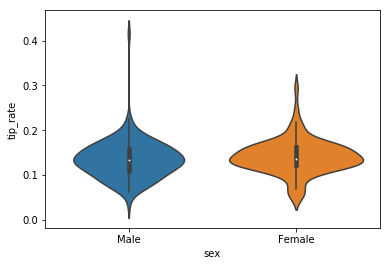

In [5]:
sns.violinplot(y="tip_rate", x="sex", data = tips)

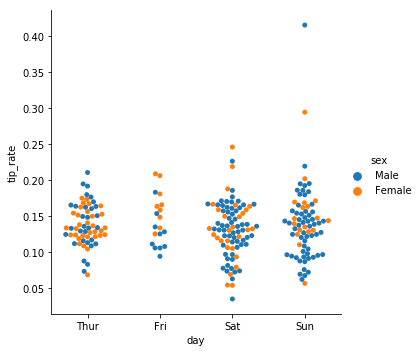

In [6]:
sns.catplot(y="tip_rate", x="day", hue="sex", kind="swarm", data=tips)

/home/lukask/.miniconda2/envs/abi/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


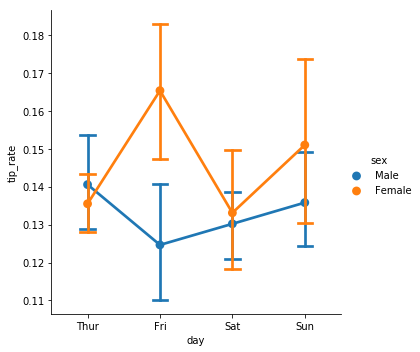

In [7]:
sns.catplot(y="tip_rate", x="day", hue="sex", kind="point", capsize=.2, data=tips)

In [8]:
y, X = dmatrices(, return_type='dataframe')

SyntaxError: invalid syntax (<ipython-input-8-0220bd681bd9>, line 1)

In [9]:
from statsmodels.formula.api import ols
mod = ols('tip_rate ~ C(sex) + C(day) + C(smoker) + C(time) + size', data=tips)

In [10]:
res = mod.fit()
table = sm.stats.anova_lm(res, typ=2)

In [11]:
#print(res.summary())
print(table)

             sum_sq     df         F    PR(>F)
C(sex)     0.002193    1.0  1.352061  0.246093
C(day)     0.006341    3.0  1.303340  0.274021
C(smoker)  0.000024    1.0  0.015060  0.902433
C(time)    0.001636    1.0  1.009041  0.316162
size       0.008842    1.0  5.452426  0.020380
Residual   0.382710  236.0       NaN       NaN


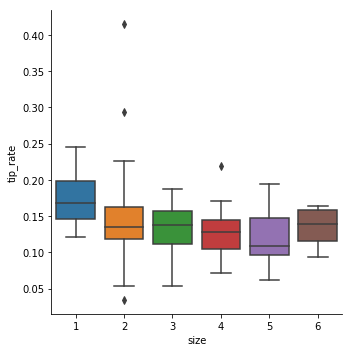

In [12]:
sns.catplot(x="size", y="tip_rate", kind="box",
            data=tips)

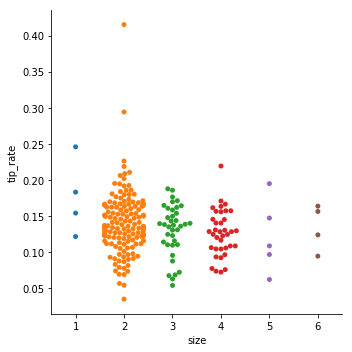

In [13]:
sns.catplot(x="size", y="tip_rate", kind="swarm",
            data=tips)

/home/lukask/.miniconda2/envs/abi/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


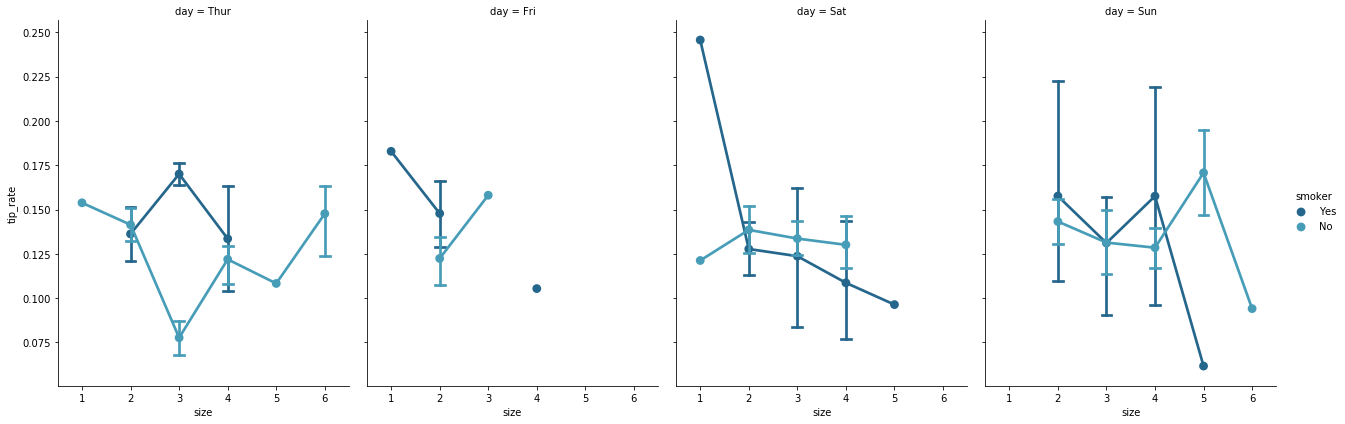

In [14]:
g = sns.catplot(x="size", y="tip_rate", hue="smoker", col="day",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=tips)

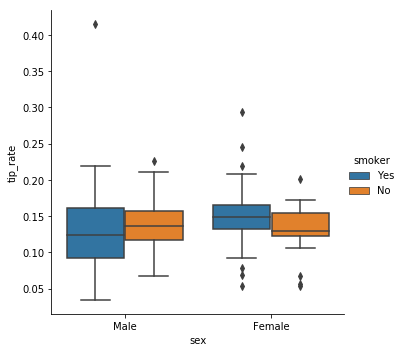

In [44]:
sns.catplot(x="sex", y="tip_rate", hue="smoker", kind="box",
            data=tips)

In [30]:
import pymc3 as pm

def our_mcmc(df,formula,family=pm.glm.families.Normal(),iterations=10000): 
    basic_model = pm.Model()
    with basic_model:
        # Create the glm using the Patsy model syntax
        pm.glm.GLM.from_formula(formula, df, family=family)

        # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
        start = pm.find_MAP()

        # Use the No-U-Turn Sampler
        step = pm.NUTS()
    
        # Calculate the trace
        trace = pm.sample(
            iterations, step, start, tune=1000,
            random_seed=42, progressbar=True)
    
        return trace, basic_model



In [45]:
trace,model = our_mcmc(tips,'tip_rate ~ C(sex) + C(smoker) + C(sex):C(smoker)')

logp = 413.42, ||grad|| = 8.1518: 100%|██████████| 26/26 [00:00<00:00, 2182.35it/s]   
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, C(sex)[T.Female]:C(smoker)[T.No], C(smoker)[T.No], C(sex)[T.Female], Intercept]
Sampling 4 chains: 100%|██████████| 44000/44000 [00:24<00:00, 1802.12draws/s]
/home/lukask/.miniconda2/envs/abi/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


In [46]:
model

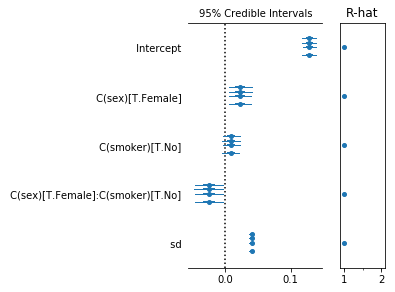

In [47]:
pm.forestplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0717d550f0>,
      dtype=object)

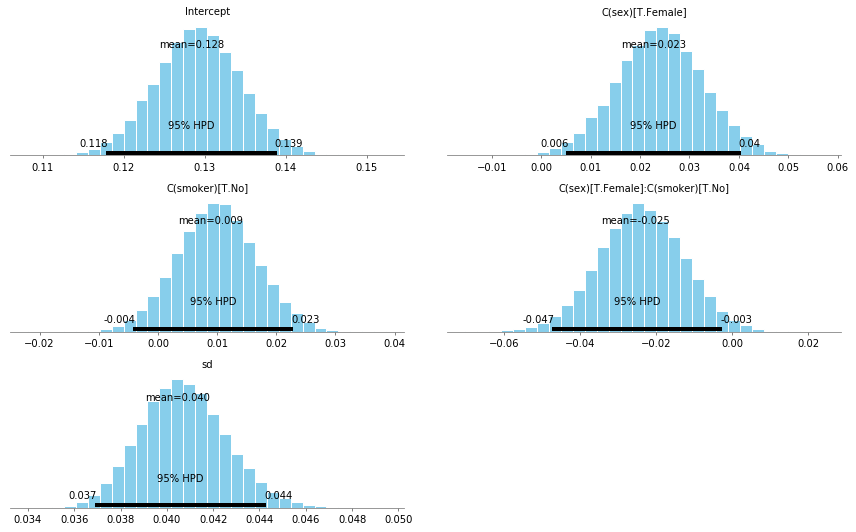

In [48]:
pm.plot_posterior(trace)

/home/lukask/.miniconda2/envs/abi/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


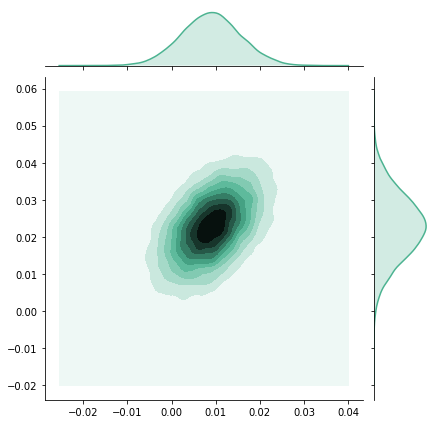

In [49]:
sns.jointplot(trace['C(smoker)[T.No]'], trace['C(sex)[T.Female]'], kind="kde", color="#4CB391")

/home/lukask/.miniconda2/envs/abi/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


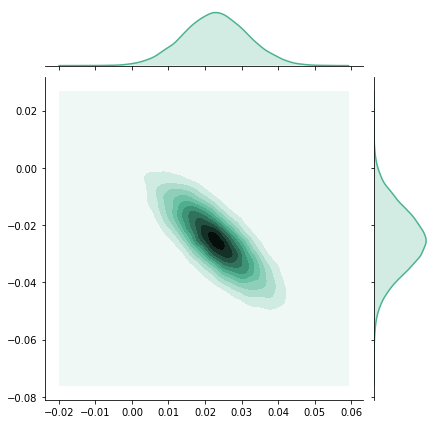

In [51]:
sns.jointplot(trace['C(sex)[T.Female]'], trace['C(sex)[T.Female]:C(smoker)[T.No]'], kind="kde", color="#4CB391")

/home/lukask/.miniconda2/envs/abi/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


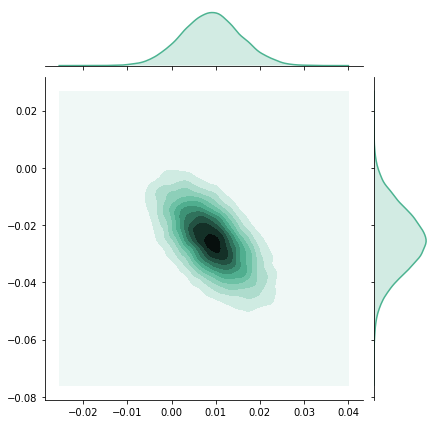

In [52]:
sns.jointplot(trace['C(smoker)[T.No]'], trace['C(sex)[T.Female]:C(smoker)[T.No]'], kind="kde", color="#4CB391")

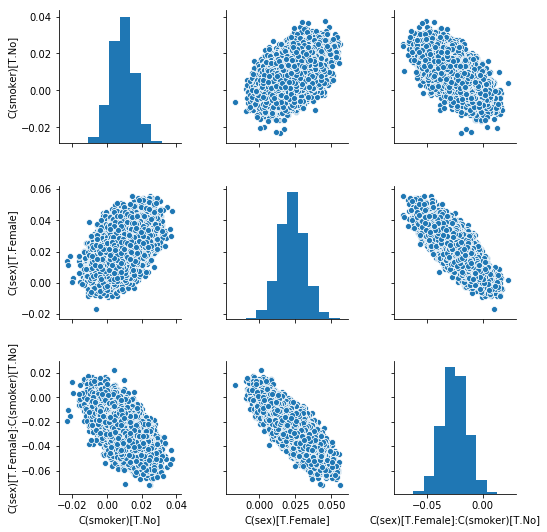

In [56]:
from pymc3.backends.tracetab import trace_to_dataframe
df=trace_to_dataframe(trace,varnames=['C(smoker)[T.No]','C(sex)[T.Female]','C(sex)[T.Female]:C(smoker)[T.No]'])
sns.pairplot(data=df,vars=['C(smoker)[T.No]','C(sex)[T.Female]','C(sex)[T.Female]:C(smoker)[T.No]'])

In [93]:
trace = our_mcmc(tips,'tip_rate ~ C(sex) + C(day) + size',pm.glm.families.StudentT())

logp = 305.98, ||grad|| = 0.33203: 100%|██████████| 43/43 [00:00<00:00, 1609.15it/s]   
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lam, size, C(day)[T.Sun], C(day)[T.Sat], C(day)[T.Fri], C(sex)[T.Female], Intercept]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:34<00:00, 1216.29draws/s]
The acceptance probability does not match the target. It is 0.8861114531101117, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8874035669970664, but should be close to 0.8. Try to increase the number of tuning steps.


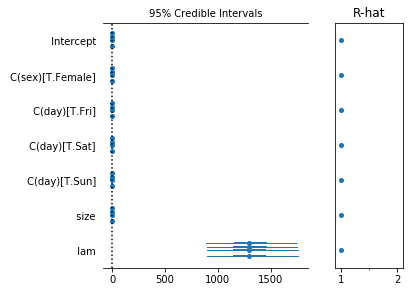

In [95]:
pm.forestplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bb16951d0>,
      dtype=object)

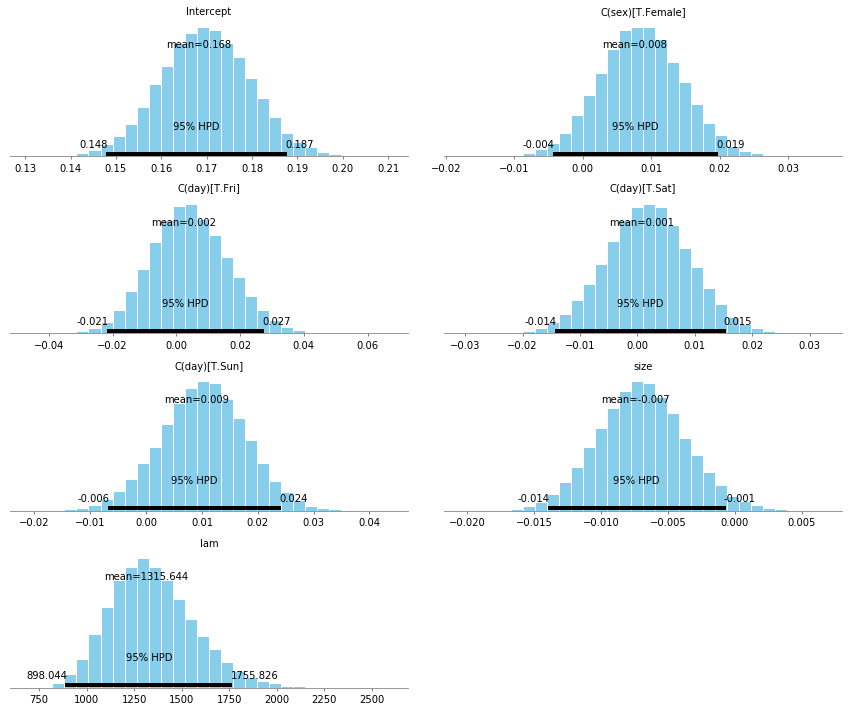

In [94]:
pm.plot_posterior(trace)

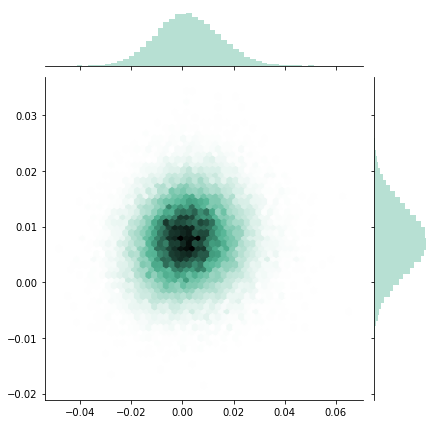

In [104]:
sns.jointplot(trace['C(day)[T.Fri]'], trace['C(sex)[T.Female]'], kind="hex", color="#4CB391")

In [99]:
    basic_model = pm.Model()
    with basic_model:
        # Create the glm using the Patsy model syntax
        pm.glm.GLM.from_formula('tip_rate ~ C(sex) + C(day) + size',tips,family=pm.glm.families.StudentT())
        basic_model

In [100]:
basic_model